<font size = 3 color = black face = "Times New Roman">Introduction: We will use two method in this problem, direct fitting and fitting with weighs, to explore Hubble's law. At the end of the problem, we will compare this two methods.

In [121]:
import numpy as np
import matplotlib.pyplot as plt

In [122]:
r = np.array([0.032, 0.9, 0.9, 0.275, 1.1, 
            0.9, 0.214, 0.263, 1.1, 0.45,
            0.034, 2.0, 1.0, 0.275,1.4, 
            0.5, 2.0, 0.8, 1.7, 0.63,
            2.0, 0.5, 2.0, 0.9])
v = np.array([170, 150, 500, -185, 500,
             650, -130, -70, 450, 200,
             290, 1090, 920, -220, 500,
             290, 500, 300, 960, 200,
             800, 270, 850, -30])

<font size = 3 color = black face = "Times New Roman">Method 1: direct fitting

<font size = 3 color = black face = "Times New Roman"> (1)

Text(0.5, 1.0, 'v-r')

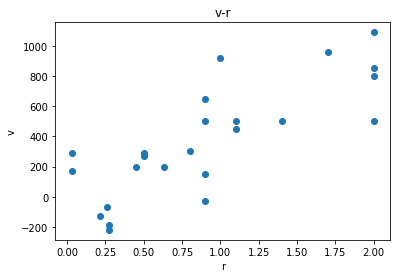

In [123]:
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')

<font size = 3 color = black face = "Times New Roman"> Although the points in the diagram are scattered, we can find that most points are distributed around a straight line.

<font size = 3 color = black face = "Times New Roman"> (2)

<font size = 3 color = black face = "Times New Roman"> Here we use 10% of the data as the error.

In [124]:
error = 0.1 * v
error

array([ 17. ,  15. ,  50. , -18.5,  50. ,  65. , -13. ,  -7. ,  45. ,
        20. ,  29. , 109. ,  92. , -22. ,  50. ,  29. ,  50. ,  30. ,
        96. ,  20. ,  80. ,  27. ,  85. ,  -3. ])

<font size = 3 color = black face = "Times New Roman"> (3)

In [125]:
def lineFit1(x, y):
    xavg = x.mean()
    slope = (y * (x-xavg)).sum()/(x * (x-xavg)).sum()
    yint = y.mean() - slope*xavg
    return slope, yint, xavg

In [126]:
H, a, r_avg = lineFit1(r, v)
print(H, a)

454.1584409226284 -40.783649095860426


<font size = 3 color = black face = "Times New Roman"> We get $H = 454.15$ and $a = -40.78$. But this value is far from the right value. Recent observed value of $H$ is about 80.

<font size = 3 color = black face = "Times New Roman"> (4)

In [127]:
def f(r):
    return H*r - a

Text(0.5, 1.0, 'v-r')

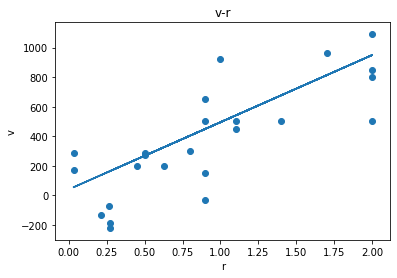

In [128]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')

<font size = 3 color = black face = "Times New Roman">This picture looks pretty reasonable.

<font size = 3 color = black face = "Times New Roman"> (5)

In [129]:
S = ((f(r) - v)**2).sum()
sigma = (S/22)**(0.5)
print(sigma)

248.00290921087552


<font size = 3 color = black face = "Times New Roman">Here we get $\sigma = 248$.

Text(0.5, 1.0, 'v-r')

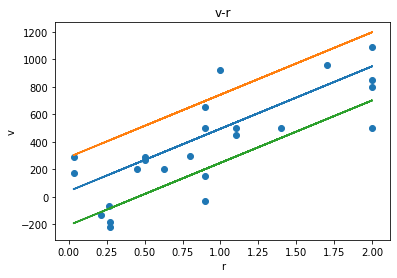

In [130]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.plot(r, v_fit + sigma)
plt.plot(r, v_fit - sigma)
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')

<font size = 3 color = black face = "Times New Roman"> We can see about 7(about a third) points miss the error band. This is in line with our expectations.

<font size = 3 color = black face = "Times New Roman"> (6)

In [131]:
x_2 = ((f(r) - v)**2/error**2).sum()
print(x_2)

28428.556282508023


<font size = 3 color = black face = "Times New Roman">We get $\chi^2 = 28428$.

<font size = 3 color = black face = "Times New Roman"> This is much larger than our expected value, because we're taking 10% of v as the error, which leads to the fact that the smaller the absolute value of v, the smaller the error, and the more dominant the calculation.For example, the error of point (0.9, -30) is only -3 compared with other points, which plays a big role in the calculation. However, although the point (2.0, 1090) is very accurate, because the value of the function v is too large, its role in the calculation is very small.

------------

<font size = 3 color = black face = "Times New Roman">Method 2: fitting with weighs 

<font size = 3 color = black face = "Times New Roman">Problem (1) and (2) are same with method 1, here we don't do that once again.

<font size = 3 color = black face = "Times New Roman">(3)

In [141]:
def lineFit2(x, y, error):
    xavg = ( (x / error**2).sum() ) / ( (1 / (error**2)).sum() )
    yavg = ( (y / error**2).sum() ) / ( (1 / (error**2)).sum() )
    a1 = ( ((x - xavg)*y/error**2).sum() ) / ( ((x - xavg)*x/error**2).sum() )
    a0 = yavg - xavg * a1
    return a1, a0, xavg, yavg

In [142]:
H, a, r_avg, v_avg = lineFit2(r, v, error)
print(H, a)

85.43587291492658 -70.45211155377314


<font size = 3 color = black face = "Times New Roman">We get $H = 85.44$ and $a = -70.45$.

<font size = 3 color = black face = "Times New Roman">This result is very amazing as this number is very close to the modern observed value of $H$.

<font size = 3 color = black face = "Times New Roman">(4)

In [134]:
def f(r):
    return H*r - a

85.43587291492658 -70.45211155377314


Text(0.5, 1.0, 'v-r')

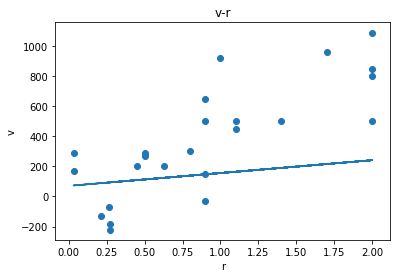

In [135]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.scatter(r, v)
print(H,a)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')

<font size = 3 color = black face = "Times New Roman">This picture doesn't looks very good. It seems that the little values of v dominate this fitting. That's because we're taking 10% of v as the error, which leads to the fact that the smaller the absolute value of v, the smaller the error, and the more dominant the calculation.

<font size = 3 color = black face = "Times New Roman">(5)

In [145]:
S = ((f(r) - v)**2).sum()
sigma = (S/22)**(0.5)
print(sigma)
sigma_H = np.sqrt(1 / ((r - r_avg)*r/error**2).sum() )
sigma_a = sigma_H * np.sqrt( (r**2/error**2).sum() / (1/error**2).sum() )
print(sigma_H, sigma_a)

410.6141113044426
8.251567403207645 6.602587168956392


<font size = 3 color = black face = "Times New Roman">We get $\sigma = 410.61$.

Text(0.5, 1.0, 'v-r')

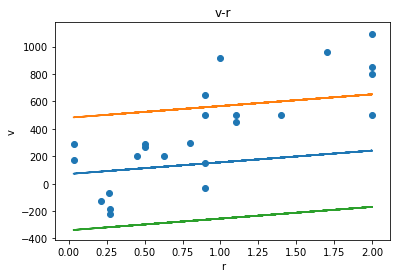

In [137]:
v_fit = f(r)
plt.plot(r, v_fit)
plt.plot(r, v_fit + sigma)
plt.plot(r, v_fit - sigma)
plt.scatter(r, v)
plt.ylabel('v')
plt.xlabel('r')
plt.title('v-r')

<font size = 3 color = black face = "Times New Roman"> We can see about 6(about a third) points miss the error band. This is in line with our expectations.

<font size = 3 color = black face = "Times New Roman"> (6)

In [138]:
x_2 = ((f(r) - v)**2/error**2).sum()
print(x_2)

5523.327896730666


<font size = 3 color = black face = "Times New Roman">We get $\chi^2 = 5523$. It means that we get a better fitting, but this is also very large. That's because the error of the points is much large in fact.

<font size = 3 color = black face = "Times New Roman">Conslusion: Using method 1, we can get a relatively pretty picture, but the data we calculate is really awful. While using method 2, we can get an surprising value of $H$ and a lower $\chi^2$, which means we get a better fitting, but the picture is not very good. Here one explain we can get of that is in Hubble's period, the error of the data is a little big, and the larger the $r$ is, the larger error $\sigma$ the $v$ has. So when fitting with weighs, the effect of the larger v is small, so we get an accurate $H$.